# Modelo SARIMA

## Revisão do ARIMA

Antes de continuar, vamos olhar para o modelo ARIMA de uma forma mais matematicamente rigorosa. Na discussão anterior a gente viu que o modelo de ARIMA é uma generalização do modelo ARMA, que por sua vez é uma generalização do modelo AR. Vamos ver como o modelo ARIMA é derivado a partir do modelo ARMA. A equação do ARMA na forma extensa é:

$$ y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \ldots + \phi_p y_{t-p} + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + \ldots + \theta_q \varepsilon_{t-q} + \varepsilon_t $$


A equação do ARIMA ($p, d, q$) pode ser derivada a partir da forma geral:

$$
\underbrace{\phi(B)}_{AR(p)}\underbrace{(1 - B)^d y_t}_{I} = \underbrace{\theta(B) \epsilon_t}_{MA(q)}
$$


Vamos derivar a equação passo a passo, explicando os componentes individuais.

### Passo 1: Componentes da Equação

- $ \phi(B) $ é o **polinômio autoregressivo (AR)** de ordem $p$, que pode ser escrito como:

$$
\phi(B) = 1 - \phi_1 B - \phi_2 B^2 - \ldots - \phi_p B^p
$$

onde $ \phi_1, \phi_2, \ldots, \phi_p $ são os coeficientes autoregressivos e $B$ é o operador defasador, ou seja, $ B y_t = y_{t-1} $.

- $ (1 - B)^d $ é o **operador de diferenciação**, usado para tornar a série $y_t$ estacionária. Para $d = 1$, temos uma diferenciação simples:

$$
(1 - B) y_t = y_t - y_{t-1}
$$

Se $d > 1$, temos um operador de diferenciação de ordem $d$, o que significa aplicar $d$ diferenças sucessivas.

- $ \theta(B) $ é o **polinômio de médias móveis (MA)** de ordem $q$, definido como:

$$
\theta(B) = 1 + \theta_1 B + \theta_2 B^2 + \ldots + \theta_q B^q
$$

onde $ \theta_1, \theta_2, \ldots, \theta_q $ são os coeficientes de médias móveis e $ \epsilon_t $ é o ruído branco (um processo estocástico com média zero e variância constante).

### Passo 2: Expansão da Equação Geral

Agora vamos expandir a equação $ \phi(B)(1 - B)^d y_t = \theta(B) \epsilon_t $ com mais detalhes.

#### Termo $ (1 - B)^d y_t $

Esse termo realiza a diferenciação da série temporal $y_t$. Se $d = 1$, o operador de diferenciação $ (1 - B) $ representa a diferença de primeira ordem, ou seja:

$$
(1 - B)y_t = y_t - y_{t-1}
$$

Se $d = 2$, temos a diferença de segunda ordem:

$$
(1 - B)^2 y_t = (y_t - y_{t-1}) - (y_{t-1} - y_{t-2}) = y_t - 2y_{t-1} + y_{t-2}
$$

De forma geral, o termo $ (1 - B)^d y_t $ calcula a diferença de ordem $d$ para a série $y_t$.

#### Polinômio AR: $ \phi(B) $

O polinômio autoregressivo $ \phi(B) $ pode ser expandido como:

$$
\phi(B) y_t = y_t - \phi_1 y_{t-1} - \phi_2 y_{t-2} - \ldots - \phi_p y_{t-p}
$$

Ou seja, é uma combinação linear dos valores defasados de $y_t$ até a ordem $p$, com os coeficientes $ \phi_1, \phi_2, \ldots, \phi_p $.

#### Polinômio MA: $ \theta(B) $

O polinômio de médias móveis $ \theta(B) $ é expandido como:

$$
\theta(B) \epsilon_t = \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \ldots + \theta_q \epsilon_{t-q}
$$

Ou seja, é uma combinação linear dos erros (ruído branco $ \epsilon_t $) até a ordem $q$, com coeficientes $ \theta_1, \theta_2, \ldots, \theta_q $.

### Passo 3: Combinação dos Componentes

Agora, combinamos todos os componentes na equação geral do ARIMA.

A equação expandida completa para o modelo ARIMA($p, d, q$) é:

$$
(1 - \phi_1 B - \phi_2 B^2 - \ldots - \phi_p B^p) (1 - B)^d y_t = (1 + \theta_1 B + \theta_2 B^2 + \ldots + \theta_q B^q) \epsilon_t
$$

Esse modelo descreve a relação entre as observações defasadas $ y_t $ (através do polinômio $ \phi(B) $) e os erros passados $ \epsilon_t $ (através do polinômio $ \theta(B) $), levando em consideração as diferenças aplicadas à série para torná-la estacionária.

### Passo 4: Caso d = 0 (Modelo ARMA)

Quando $d = 0$, o modelo ARIMA se reduz ao modelo ARMA($p, q$), que é dado por:

$$
\phi(B) y_t = \theta(B) \epsilon_t
$$

Nesse caso, não há necessidade de diferenciação, pois a série já é estacionária. Assim, o modelo ARMA captura diretamente a relação entre os valores passados da série $y_t$ e os erros passados $ \epsilon_t $.


## SARIMA

O modelo **SARIMA** (Seasonal Autoregressive Integrated Moving Average) é uma extensão do modelo **ARIMA** que incorpora componentes sazonais, o que o torna especialmente útil para séries temporais com padrões periódicos. O SARIMA combina três elementos principais: 

1. O modelo **ARIMA** (não sazonal).
2. Um componente **sazonal ARIMA**.
3. Um termo de **sazonalidade**, que lida com repetições periódicas na série.

### Representação Matemática

O modelo SARIMA é descrito pela seguinte equação:

$$
\phi(B)(1 - B)^d (1 - B^s)^D y_t = \theta(B) \epsilon_t
$$

onde:
- $ B $ é o operador defasador (ou operador de diferença): $ B^d y_t = y_t - y_{t-d} $, e $ d $ é o número de diferenças (não sazonais).
- $ \phi(B) $ é o polinômio autoregressivo (AR).
- $ \theta(B) $ é o polinômio de médias móveis (MA).
- $ D $ é o número de diferenças sazonais.
- $ s $ representa a sazonalidade (número de períodos por ciclo).
- $ y_t $ é a série temporal observada.
- $ \epsilon_t $ é o ruído branco (erro aleatório).

### Componentes do Modelo

#### 1. Parte Autoregressiva (AR)
O termo autoregressivo é representado pelo polinômio $ \phi(B) $, definido como:

$$
\phi(B) = 1 - \phi_1 B - \phi_2 B^2 - \ldots - \phi_p B^p
$$

onde $ \phi_1, \phi_2, \ldots, \phi_p $ são os coeficientes do modelo autoregressivo e $ p $ é a ordem da parte AR.

#### 2. Parte de Médias Móveis (MA)
O termo de médias móveis é representado pelo polinômio $ \theta(B) $, definido como:

$$
\theta(B) = 1 + \theta_1 B + \theta_2 B^2 + \ldots + \theta_q B^q
$$

onde $ \theta_1, \theta_2, \ldots, \theta_q $ são os coeficientes da parte de médias móveis e $ q $ é a ordem da parte MA.

#### 3. Diferenciação Não Sazonal
A diferenciação não sazonal é representada pelo termo $ (1 - B)^d $, que se aplica para remover tendências na série. O termo é definido como:

$$
(1 - B)^d = (1 - B)(1 - B)\ldots(1 - B)
$$

onde $ d $ é o número de diferenças não sazonais.

#### 4. Diferenciação Sazonal
A diferenciação sazonal é representada pelo termo $ (1 - B^s)^D $, que remove a sazonalidade da série. Esse termo é definido como:

$$
(1 - B^s)^D = (1 - B^s)(1 - B^s)\ldots(1 - B^s)
$$

onde $ D $ é o número de diferenças sazonais e $ s $ é o número de períodos em cada temporada.

### Notação do Modelo

O modelo SARIMA é comumente representado na forma SARIMA($p, d, q$)($P, D, Q$)$_m$, onde:
- $p$, $d$, $q$ são os parâmetros do modelo ARIMA (não sazonal).
- $P$, $D$, $Q$ são os parâmetros do componente sazonal ARIMA.
- $m$ é o número de períodos sazonais em cada ciclo.


Essa versão reorganiza as informações para facilitar a compreensão, abordando cada parte do modelo de maneira mais clara e sequencial, além de incluir explicações mais detalhadas sobre os termos matemáticos. Mas, como podemos achar o valor de $m$?

- Assumindo que temos **um ciclo de um ano**

|Data| Frequência $m$|
|----|----------------|
|Anual| 1|
|Trimestral| 4|
|Mensal| 12|
|Semanal| 52|
|Diário| 365|


- Para dados diarios e sub-diários,
<table>
  <tr>
    <td></td>
    <td colspan="5" align="center">Frequencia m</td>
  </tr>
  <tr>
    <th>Data</th>
    <th>Minuto</th>
    <th>Hora</th>
    <th>Dia</th>
    <th>Semana</th>
    <th>Ano</th>
  </tr>
  <tr>
    <td>Diário</td>
    <td></td>
    <td></td>
    <td></td>
    <td>7</td>
    <td>365</td>
  </tr>
  <tr>
    <td>Hora</td>
    <td></td>
    <td></td>
    <td>24</td>
    <td>168</td>
    <td>8766</td>
  </tr>
  <tr>
    <td>Minuto</td>
    <td></td>
    <td>60</td>
    <td>1440</td>
    <td>10080</td>
    <td>525960</td>
    
  </tr>
  <tr>
    <td>Segundo</td>
    <td>60</td>
    <td>3600</td>
    <td>86400</td>
    <td>604800</td>
    <td>31557600</td>
  </tr>
</table>




Por exemplo, quando temos dados mensais de varios anos e a sazonalidade é anual (12 meses), a frequencia $m$ é 12. Se a sazonalidade é trimestral, a frequencia $m$ é 4. Se a sazonalidade é semanal, a frequencia $m$ é 52. Se a sazonalidade é diária, a frequencia $m$ é 365.

### Entendendo $P$, $D$ e $Q$

- $P$ é a ordem do modelo autorregressivo sazonal. Por exemplo, se a sazonalidade é anual e o modelo autorregressivo é 2, então $P=2$. Esse significa $y_{t-12}$ e $y_{t-24}$ são usados para prever $y_t$.
- $Q$ é a ordem do modelo de média móvel sazonal. Por exemplo, se a sazonalidade é anual e o modelo de média móvel é 2, então $Q=2$. Esse significa que temos que incluir, por exemplo, $\theta_{12} \epsilon_{t-12}$ e $\theta_{24} \epsilon_{t-24}$ para prever $y_t$.
- $D$ é a ordem de diferenciação sazonal. Por exemplo, se a sazonalidade é anual e a série temporal é diferenciada uma vez para torná-la estacionária, então $D=1$. Isso significa que a diferença entre $y_{t-12}$ e $y_t$ é estacionária.

### Identificação do Modelo SARIMA

Uma visuaização da série temporal é útil para identificar padrões sazonais e tendências. 

Uma plot de decomposição da série temporal pode ajudar a identificar os componentes de tendência, sazonalidade e ruído. A decomposição da série temporal pode ser feita usando a função `seasonal_decompose` do `statsmodels`:

```python
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data, model='additive')
result.plot()
plt.show()
```


## Implementação em Python

In [1]:
from statsmodels.tsa.seasonal import STL
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from tqdm import tqdm_notebook
from itertools import product
from typing import Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = (9,6)

### Exploring seasonality 

In [3]:
# source: https://raw.githubusercontent.com/plotly/datasets/master/monthly-milk-production-pounds.csv

df = pd.read_csv('../data/milk_prod.csv')
df.columns = ['Month', 'Milk']

df.head()

,Month,Milk
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


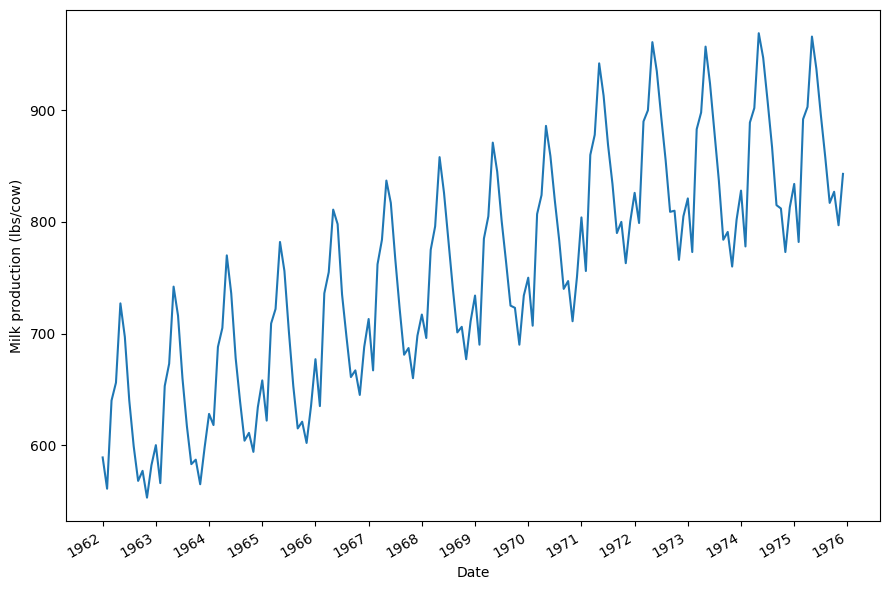

In [4]:
fig, ax = plt.subplots()

ax.plot(df['Month'], df['Milk'])
ax.set_xlabel('Date')
ax.set_ylabel('Milk production (lbs/cow)')

plt.xticks(np.arange(0, 179, 12), np.arange(1962, 1977, 1))

fig.autofmt_xdate()
plt.tight_layout()

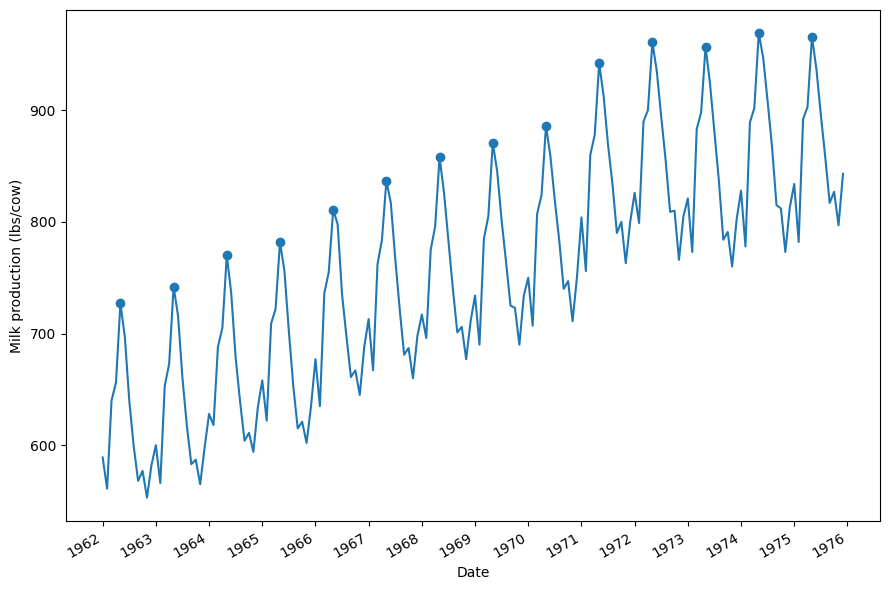

In [5]:
fig, ax = plt.subplots()

ax.plot(df['Month'], df['Milk'], markevery=np.arange(4, 169, 12), marker='o')
ax.set_xlabel('Date')
ax.set_ylabel('Milk production (lbs/cow)')

plt.xticks(np.arange(0, 179, 12), np.arange(1962, 1977, 1))

fig.autofmt_xdate()
plt.tight_layout()

Na figura acima, observe como a série atinge o pico em torno do mesmo mês todo ano. Esta é uma indicação clara de sazonalidade.

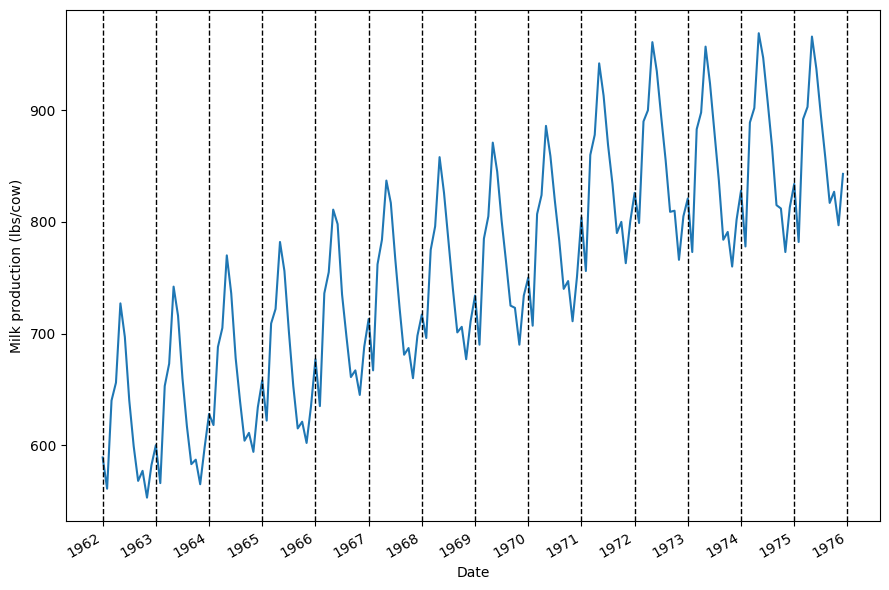

In [6]:
fig, ax = plt.subplots()

ax.plot(df['Month'], df['Milk'])
for i in np.arange(0, 169, 12):
    ax.axvline(x=i, linestyle='--', color='black', linewidth=1)
ax.set_xlabel('Date')
ax.set_ylabel('Milk production (lbs/cow)')

plt.xticks(np.arange(0, 179, 12), np.arange(1962, 1977, 1))

fig.autofmt_xdate()
plt.tight_layout()

Na figura acima, cada linha tracejada vertical representa o fim do ano. Podemos ver que o padrão geral em um ano se repete a cada ano, sugerindo uma sazonalidade anual.

### Decomposition 

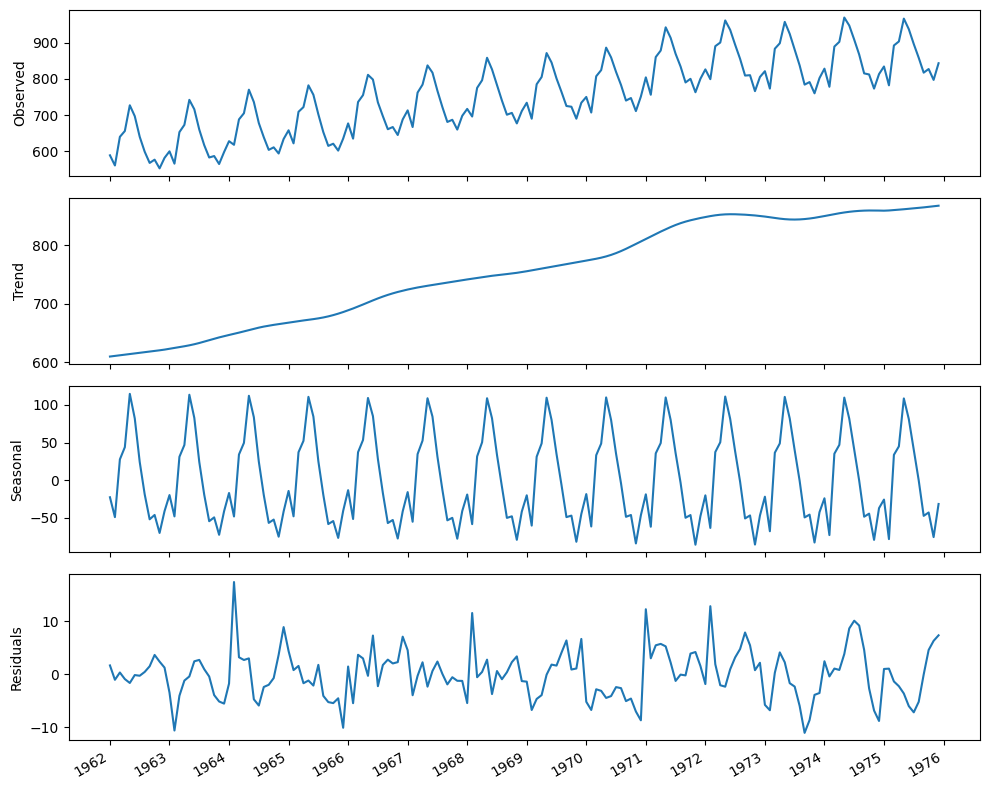

In [7]:
decomposition = STL(df['Milk'], period=12).fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10,8))

ax1.plot(decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(decomposition.resid)
ax4.set_ylabel('Residuals')

plt.xticks(np.arange(0, 179, 12), np.arange(1962, 1977, 1))

fig.autofmt_xdate()
plt.tight_layout()

### Forecasting with SARIMA 

In [8]:
ad_fuller_result = adfuller(df['Milk'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -1.3038115874221308
p-value: 0.6274267086030311


#### Differencing and stationarity

In [9]:
df_diff = np.diff(df['Milk'], n=1)

ad_fuller_result = adfuller(df_diff)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -3.0549955586530992
p-value: 0.03006800400178324


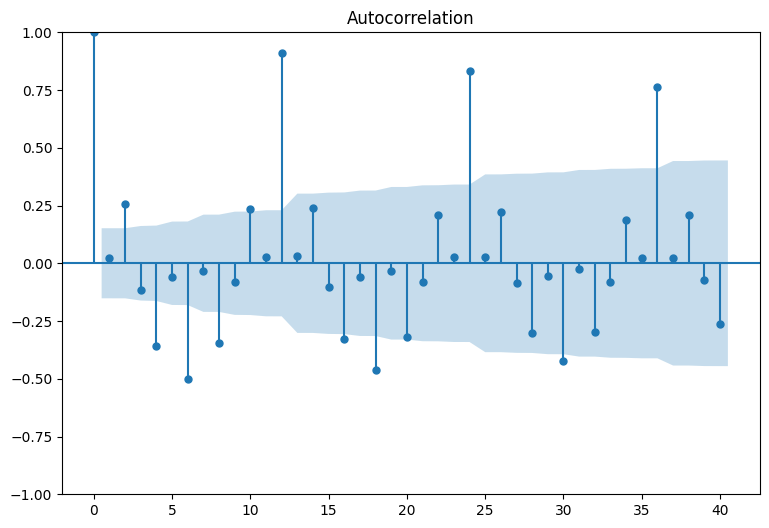

In [26]:
plot_acf(df_diff, lags=40)
plt.show()

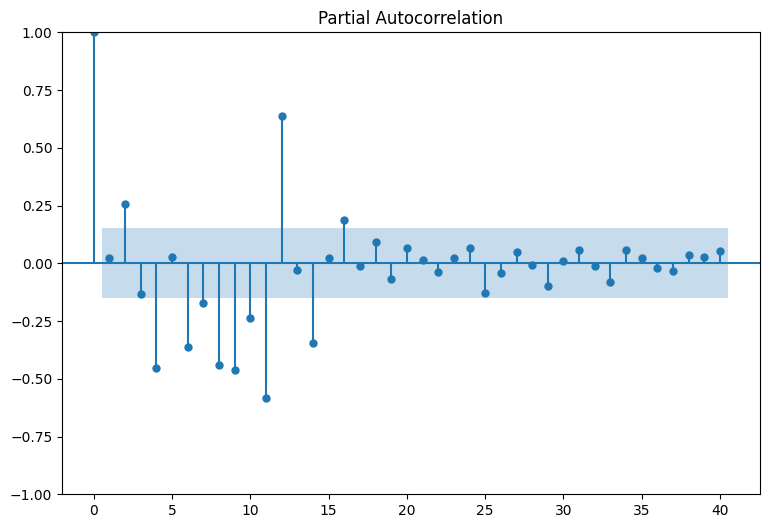

In [28]:
plot_pacf(df_diff, lags=40)
plt.show()

In [10]:
df_diff_seasonal_diff = np.diff(df_diff, n=12)

ad_fuller_result = adfuller(df_diff_seasonal_diff)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -26.568403962965988
p-value: 0.0


#### Define test set 

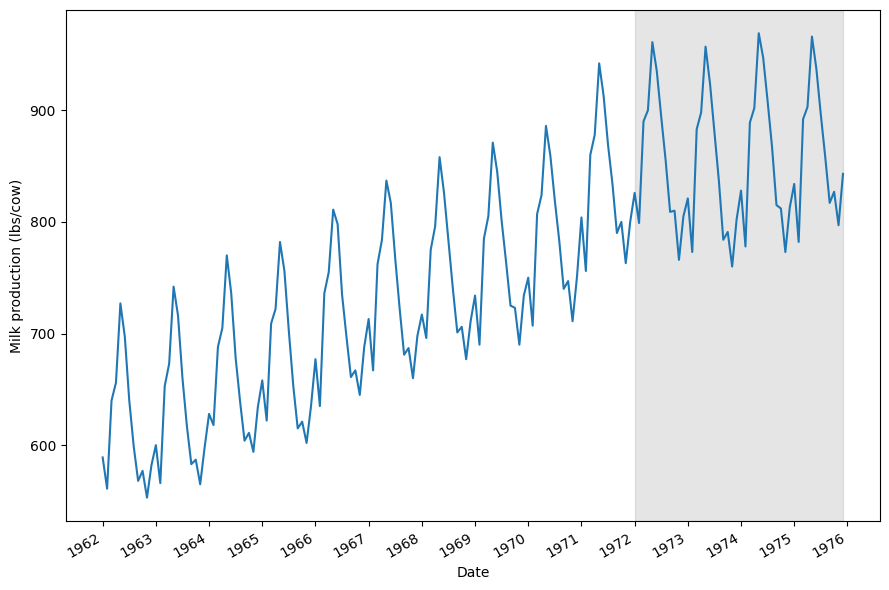

In [11]:
fig, ax = plt.subplots()

ax.plot(df['Month'], df['Milk'])
ax.set_xlabel('Date')
ax.set_ylabel('Milk production (lbs/cow)')
ax.axvspan(120, 167, color='#808080', alpha=0.2)

plt.xticks(np.arange(0, 179, 12), np.arange(1962, 1977, 1))

fig.autofmt_xdate()
plt.tight_layout()

In [12]:
train = df[:-48]
test = df[-48:]

#### Model selection with AIC 

In [13]:
def SARIMA_gridsearch(endog, min_p, max_p, min_q, max_q, min_P, max_P, min_Q, max_Q, d, D, s):
    
    all_p = range(min_p, max_p+1, 1)
    all_q = range(min_q, max_q+1, 1)
    all_P = range(min_P, max_P+1, 1)
    all_Q = range(min_Q, max_Q+1, 1)
    
    all_orders = list(product(all_p, all_q, all_P, all_Q))
    
    print(f'Fitting {len(all_orders)} unique models')
    
    results = []
    
    for order in tqdm_notebook(all_orders):
        try: 
            model = SARIMAX(
                endog, 
                order=(order[0], d, order[1]),
                seasonal_order=(order[2], D, order[3], s)).fit(disp=False)
        except:
            continue
            
        results.append([order, model.aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q,P,Q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [14]:
# the below values are assigned the variables to reduce the processing time
min_p = 0
max_p = 3
min_q = 0
max_q = 3

min_P = 0
max_P = 2
min_Q = 0
max_Q = 2

d = 1
D = 1
s = 12

result_df = SARIMA_gridsearch(train['Milk'], min_p, max_p, min_q, max_q, min_P, max_P, min_Q, max_Q, d, D, s)
result_df.head()

Fitting 144 unique models


  0%|          | 0/144 [00:00<?, ?it/s]

,"(p,q,P,Q)",AIC
0,"(0, 1, 0, 1)",741.559091
1,"(1, 0, 0, 1)",741.910895
2,"(2, 1, 0, 1)",742.072935
3,"(2, 0, 0, 1)",742.689115
4,"(3, 0, 0, 1)",742.731431


In [15]:
SARIMA_model = SARIMAX(train['Milk'], order=(0,1,4), seasonal_order=(0,1,1,12))
SARIMA_model_fit = SARIMA_model.fit(disp=False)

print(SARIMA_model_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                 Milk   No. Observations:                  120
Model:             SARIMAX(0, 1, 4)x(0, 1, [1], 12)   Log Likelihood                -364.360
Date:                              Tue, 01 Oct 2024   AIC                            740.720
Time:                                      10:28:10   BIC                            756.757
Sample:                                           0   HQIC                           747.221
                                              - 120                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3622      0.103     -3.519      0.000      -0.564      -0.160
ma.L2          0.05

#### Residuals analysis 

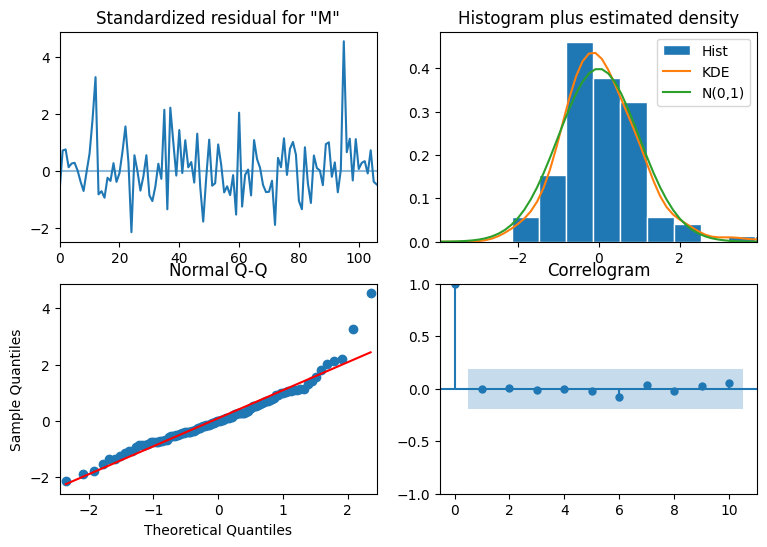

In [16]:
SARIMA_model_fit.plot_diagnostics();

Vamos olhar para os residus melhor

In [17]:
def ljung_box_test(residuals, is_seasonal, period):
    
    if is_seasonal:
        lb_df = acorr_ljungbox(residuals, period=period)
    else:
        max_lag = min([10, len(residuals)/5])
        
        lb_df = acorr_ljungbox(residuals, np.arange(1, max_lag+1, 1))

    fig, ax = plt.subplots()
    ax.plot(lb_df['lb_pvalue'], 'b-', label='p-values')
    ax.hlines(y=0.05, xmin=1, xmax=len(lb_df), color='black')
    plt.tight_layout()
    
    if all(pvalue > 0.05 for pvalue in lb_df['lb_pvalue']):
        print('All values are above 0.05. We fail to reject the null hypothesis. The residuals are uncorrelated')
    else:
        print('At least one p-value is smaller than 0.05')

At least one p-value is smaller than 0.05


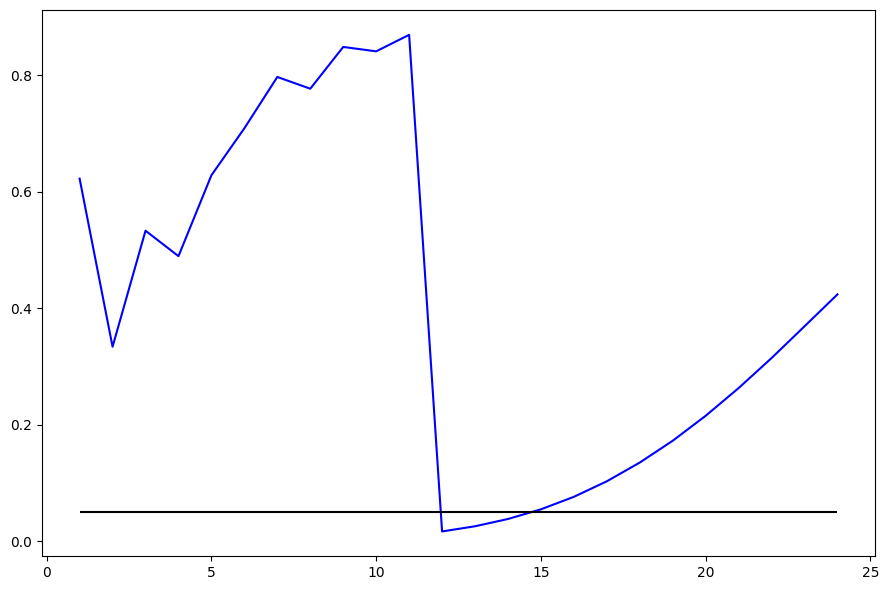

In [18]:
residuals = SARIMA_model_fit.resid

ljung_box_test(residuals, True, 12)

#### Forecasting 

In [19]:
def rolling_predictions(df, train_len, horizon, window, period, method):
    
    TOTAL_LEN = train_len + horizon
    
    seasonal_steps = int((window/period))
    
    if method == 'mean':
        pred_mean = []
        
        for i in range(train_len, TOTAL_LEN, window):
            mean = np.mean(df[:i].values)
            pred_mean.extend(mean for _ in range(window))
        
        return pred_mean[:horizon]

    elif method == 'last':
        pred_last_value = []
        
        for i in range(train_len, TOTAL_LEN, window):
            last_value = diff[:i].iloc[-1].values[0]
            pred_last_value.extend(last_value for _ in range(window))

        return pred_last_value[:horizon]
    
    elif method == 'last_season':
        pred_last_season = []
        
        for i in range(train_len, TOTAL_LEN, window):
            last_season = df[:i][-period:].values
            pred_last_season.extend(last_season for _ in range(seasonal_steps))

        pred_last_season = np.array(pred_last_season).reshape(1, -1)
        
        return pred_last_season[0][:horizon]
    
    if method == 'SARIMA':
        pred_SARIMA = []
        
        for i in range(train_len, TOTAL_LEN, window):
            model = SARIMAX(df[:i], order=(0,1,4), seasonal_order=(0,1,1,12))
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            oos_pred = predictions.predicted_mean[-window:]
            pred_SARIMA.extend(oos_pred)
            
        return pred_SARIMA[:horizon]

In [20]:
pred_df = test.copy()

TRAIN_LEN = len(train)
HORIZON = len(test)

windows = [12, 24, 36, 48]

for window in windows:
    pred_last_season = rolling_predictions(df['Milk'], TRAIN_LEN, HORIZON, window, 12, 'last_season')
    pred_SARIMA = rolling_predictions(df['Milk'], TRAIN_LEN, HORIZON, window, 12, 'SARIMA')

    pred_df[f'pred_last_season_{window}'] = pred_last_season
    pred_df[f'pred_SARIMA_{window}'] = pred_SARIMA

pred_df.head()

,Month,Milk,pred_last_season_12,pred_SARIMA_12,pred_last_season_24,pred_SARIMA_24,pred_last_season_36,pred_SARIMA_36,pred_last_season_48,pred_SARIMA_48
120,1972-01,826,804,836.947904,804,836.947904,804,836.947904,804,836.947904
121,1972-02,799,756,791.727755,756,791.727755,756,791.727755,756,791.727755
122,1972-03,890,860,890.761697,860,890.761697,860,890.761697,860,890.761697
123,1972-04,900,878,909.982548,878,909.982548,878,909.982548,878,909.982548
124,1972-05,961,942,972.969162,942,972.969162,942,972.969162,942,972.969162


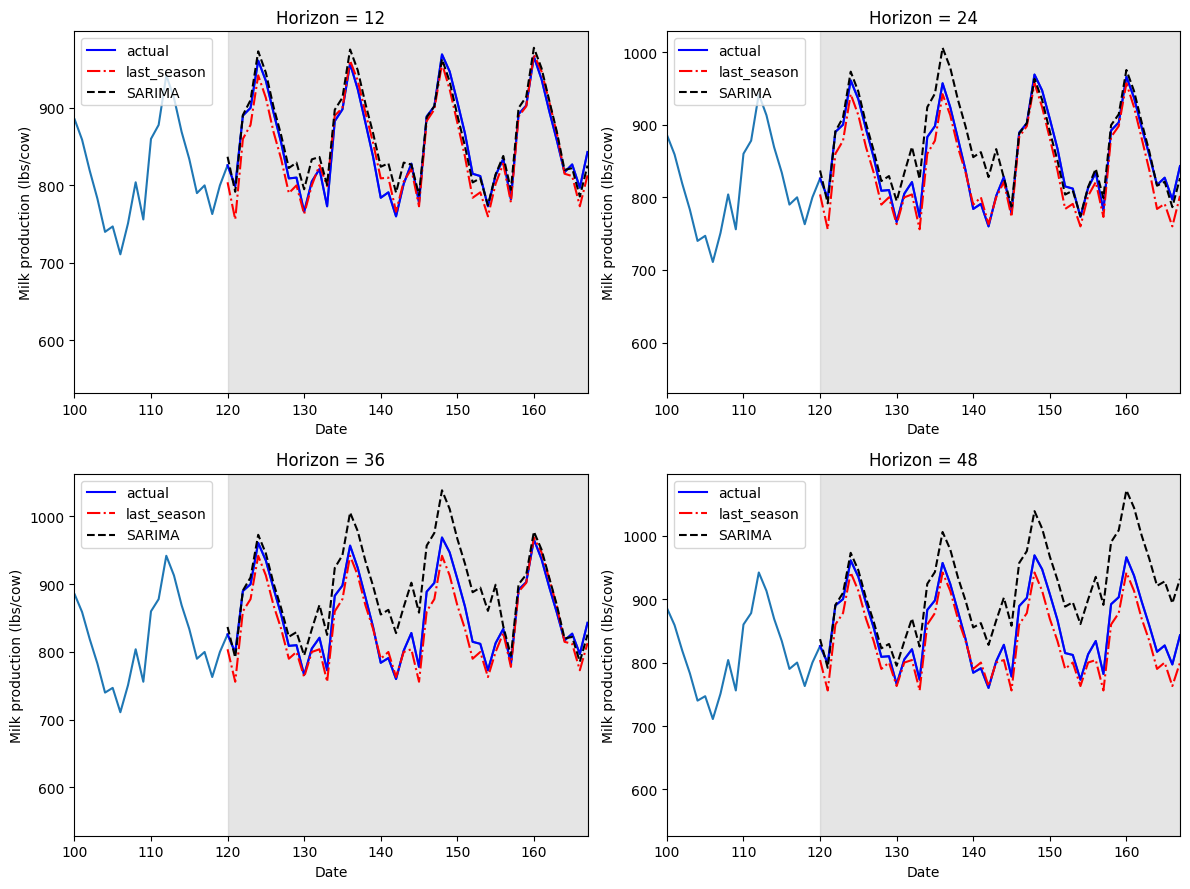

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,9))

for i, ax in enumerate(axes.flatten()):
    
    ax.plot(df['Milk'])
    ax.plot(pred_df['Milk'], 'b-', label='actual')
    ax.plot(pred_df[f'pred_last_season_{windows[i]}'], 'r-.', label='last_season')
    ax.plot(pred_df[f'pred_SARIMA_{windows[i]}'], 'k--', label='SARIMA')
    
    ax.legend(loc=2)
    ax.set_xlabel('Date')
    ax.set_ylabel('Milk production (lbs/cow)')
    ax.axvspan(120, 167, color='#808080', alpha=0.2)
    ax.set_xlim(100, 167)
    ax.set_title(f'Horizon = {windows[i]}')
    
plt.tight_layout()

#### Evaluation 

In [22]:
def mape(y_true, y_pred):
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)

In [23]:
mape_naive_seasonal_12 = mape(pred_df['Milk'], pred_df['pred_last_season_12'])
mape_SARIMA_12 = mape(pred_df['Milk'], pred_df['pred_SARIMA_12'])

mape_naive_seasonal_24 = mape(pred_df['Milk'], pred_df['pred_last_season_24'])
mape_SARIMA_24 = mape(pred_df['Milk'], pred_df['pred_SARIMA_24'])

mape_naive_seasonal_36 = mape(pred_df['Milk'], pred_df['pred_last_season_36'])
mape_SARIMA_36 = mape(pred_df['Milk'], pred_df['pred_SARIMA_36'])

mape_naive_seasonal_48 = mape(pred_df['Milk'], pred_df['pred_last_season_48'])
mape_SARIMA_48 = mape(pred_df['Milk'], pred_df['pred_SARIMA_48'])

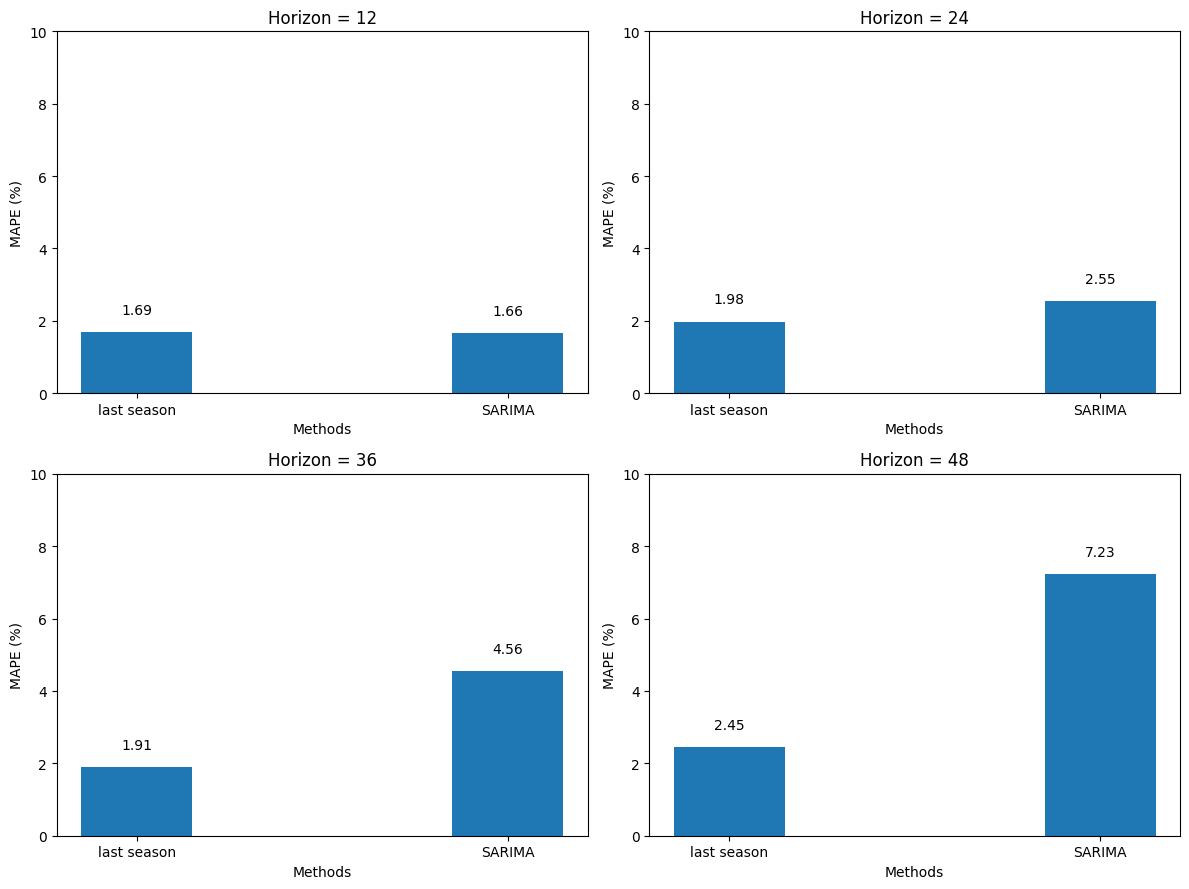

In [24]:
mapes_naive_seasonal = [mape_naive_seasonal_12, mape_naive_seasonal_24, mape_naive_seasonal_36, mape_naive_seasonal_48]
mapes_SARIMA = [mape_SARIMA_12, mape_SARIMA_24, mape_SARIMA_36, mape_SARIMA_48]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,9))

x = ['last season', 'SARIMA']
width = 0.3

for i, ax in enumerate(axes.flatten()):
    
    y = [mapes_naive_seasonal[i], mapes_SARIMA[i]]
    ax.bar(x, y, width)
    ax.set_xlabel('Methods')
    ax.set_ylabel('MAPE (%)')
    ax.set_ylim(0, 10)
    ax.set_title(f'Horizon = {windows[i]}')    
    
    for index, value in enumerate(y):
        ax.text(x=index, y=value+0.5, s=str(value), ha='center')

plt.tight_layout()